# Práctica 1 - 3200 Phaeton
# Simulación 1
## Origen y Evolución de los Sistemas Planetarios
## Facultad de Ciencias, UNAM, 2021-1

Un seguimiento de los elementos orbitales de 3200 Phaeton, así como de su argumento resonante con Venus, durante 10,000 años.

# Importación de librerias

In [2]:
import rebound                         # Para la simulación
import numpy as np                     # Para almacenar información y hacer cálculos con ella
import matplotlib.pyplot as plt        # Para graficar
labels = ['Venus', '3200 Phaeton']     # Etiquetas para las gráficas

# Parámetros generales de la simulación

In [3]:
sim = rebound.Simulation()             # Comenzamos la simulación
sim.units = ('AU','yr','Msun')         # Asignamos unidades: UA (distancia), años (tiempo), masas solares (masa)

# Añadimos los objetos

In [4]:
sim.add('Sun')
sim.add('Mercury')
sim.add('Venus')
sim.add('1983 TB')                     # 3200 Phaeton
sim.add('Earth')
sim.add('Mars')
sim.add('Jupiter')
sim.add('Saturn')
sim.add('Uranus')
sim.add('Neptune')

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for '1983 TB'... Found: 3200 Phaethon (1983 TB).
Searching NASA Horizons for 'Earth'... 

/home/luiseduardo/anaconda3/lib/python3.8/site-packages/rebound/horizons.py:140: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


## Datos de respaldo
Elementos orbitales de los planetas y de 3200 Phaeton para utilizar en caso de que haya un problema con el JPL NASA Horizons. Los ángulos están en radianes, el semieje mayor está en UA y la masa en masas solares. 

In [80]:
# Sol
sim.add(m=1)
# Mercurio
sim.add(m = 1.651*10**-7, a = 0.3871, e = 0.2056, inc = 1.2226, Omega = 0.8436, omega = 1.3519, f = 4.4026)
# Venus
sim.add(m = 2.447*10**-6, a = 0.7233, e = 0.0068, inc = 0.0592, Omega = 1.3383, omega = 2.2957, f = 3.1761)
# 3200 Phaeton (1983 TB)
sim.add(a=1.27120790, e=0.88999396, inc=0.3872,Omega=4.62835651,omega=5.62029,M=0.0146186)
# Tierra
sim.add(m = 3.0027*10**-6, a = 1.0, e = 0.0167, inc = 8.7267*10**-7, Omega = -0.1965, omega = 1.7968, f = 1.7534)
# Marte
sim.add(m = 3.213*10**-7, a = 1.5237, e = 0.0934, inc = 0.0323, Omega = 0.8653, omega = 5.8650, f = 6.2038)
# Júpiter
sim.add(m = 9.5459*10**-4, a = 5.2034, e = 0.0484, inc = 0.0228, Omega = 1.7550, omega = 0.2575, f = 0.6005)
# Saturno
sim.add(m = 2.857*10**-4, a = 9.5371, e = 0.0542, inc = 0.04336, Omega = 1.9847, omega = 1.6132, f = 0.8717)
# Urano
sim.add(m = 4.365*10**-5, a = 19.1913, e = 0.0472, inc = 0.01344, Omega = 1.2956, omega = 2.9839, f = 5.4669)
# Neptuno
sim.add(m = 5.149*10**-5, a = 30.0690, e = 0.00858, inc = 0.0309, Omega = 2.2990, omega = 0.7849, f = 5.3212)

# Más parámetros de la simulación

In [5]:
# Integrador
sim.integrator = 'whfast'    # Preferimos rapidez que precisión
# Paso de integración (fijo)
sim.dt = 0.01                # 3.65 días
# Nos movemos al centro de masa
sim.move_to_com()            

# Haciendo la simulación

In [6]:
# Número de salidas
Nout = 10000
# Tiempo que durará la simulación (años)
tmax = 10000
# Número de objetos (Planetas+3200 Phaeton)
Nplanets = 9

# Arrays para guardar los elementos orbitales 
a = np.zeros((Nplanets,Nout))
ecc = np.zeros((Nplanets,Nout))
inc = np.zeros((Nplanets,Nout))
longitude = np.zeros((Nplanets,Nout))
Omega = np.zeros((Nplanets,Nout))
omega = np.zeros((Nplanets,Nout))
varpi = np.zeros((Nplanets,Nout))
n = np.zeros((Nplanets,Nout))
M = np.zeros((Nplanets,Nout))

# Array para guardar los tiempos
times = np.linspace(0.,tmax,Nout)

# Objeto con las partículas de la simulación
ps = sim.particles

# Integración
for i,time in enumerate(times):
    
    # Integra hasta t = time
    sim.integrate(time)
    
    # Se calculan los elementos orbitales de los objetos de la simulación
    os = sim.calculate_orbits()
    for j in [1,2]:
        # Se guardan los elementos orbitales en sus respectivos arrays.
        a[j][i] = os[j].a
        ecc[j][i] = os[j].e
        inc[j][i] = os[j].inc
        longitude[j][i] = os[j].l
        omega[j][i] = os[j].omega
        Omega[j][i] = os[j].Omega
        varpi[j][i] = os[j].Omega+os[j].omega
        M[j][i] = os[j].M
        n[j][i] = os[j].n

# Cálculo de cantidades adicionales

In [7]:
# Función que convierte un ángulo en radianes en un ángulo en grados entre 0 y 360
def zeroTo360(val):
    while val < 0 :
        val += 2*np.pi
    while val > 2*np.pi :
        val -= 2*np.pi
    return (val*180/np.pi)

# Cálculo del argumento resonante
phi = [zeroTo360(7.*longitude[2][i]-3.*longitude[1][i]-4.*varpi[2][i]) for i in range(Nout)]
# Cálculo de la banda resonante
alpha = [(7.*n[2][i]-3.*n[1][i]) for i in range(Nout)]

# Cálculo de la posición esperada de la resonancia 3:7 con Venus
C_pq = (1+4/3)**(2/3)
a_resonance = [a[1][i]*C_pq  for i in range(Nout)]
# Conversión de rad/año a arcseg/día
alpha_arcseg = [alpha[i]*565.110 for i in range(len(alpha))]

## Ángulo teórico del primer loop
La teoría predice que el primer loop del movimiento de 3200 Phaeton visto desde Venus se encontrará a un ángulo $\frac{\phi}{3}$.

In [22]:
print(np.average(phi)/3.)

60.23745887741658


# Gráficas

## Gráfica para comprobar que todo haya salido bien

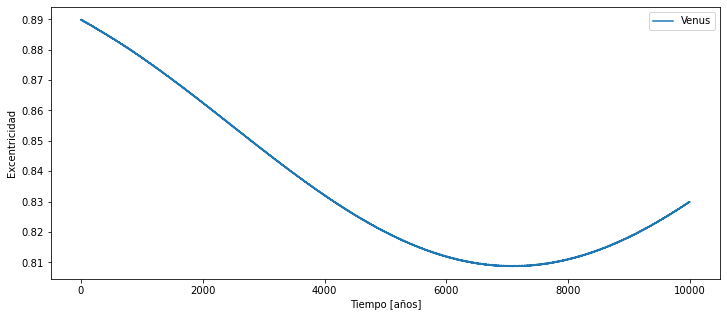

In [8]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[2],label = labels[0])
ax.set_xlabel('Tiempo [años]')
ax.set_ylabel('Excentricidad')
plt.legend();

## Evolución del semieje mayor
Se grafica la evolución del semieje mayor de 3200 Phaeton a lo largo de 10,000 años. Además, se incluye la posición esperada de la resonancia 3:7 con Venus.

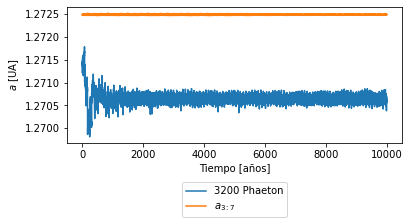

In [18]:
# Tamaño de la figura
fig = plt.figure(figsize=(6,2.5))
ax = plt.subplot(111)
# Gráficas
plt.plot(times,a[2],label = labels[1])
plt.plot(times,a_resonance,label = '$a_{3:7}$')
# Etiquetas de los ejes
ax.set_xlabel('Tiempo [años]')
ax.set_ylabel(r'$a$ [UA]')
# Posición de la leyenda
plt.legend(loc='upper center',bbox_to_anchor = (0.5,-0.25))
# Guardar la figura en un archivo
plt.savefig('3200Phaeton_a.pdf',bbox_inches='tight');

## Argumento resonante
Se grafica la evolución del argumento resonante de 3200 Phaeton con Venus. Además, se incluye un acercamiento a los primeros 500 años para apreciar mejor el comportamiento oscilatorio de $\phi$.

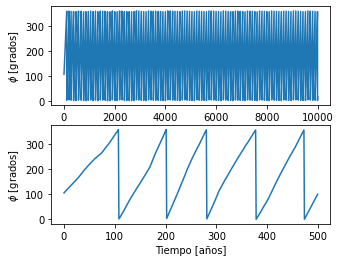

In [21]:
# Dos subplots
fig, (ax1,ax2) = plt.subplots(2,figsize=(5,4))
# Argumento resonante (10,000 años)
ax1.plot(times,phi)
ax1.set_ylabel(r'$\phi$ [grados]')
# Argumento resonante (500 años)
ax2.plot(times[0:500],phi[0:500])
ax2.set_ylabel(r'$\phi$ [grados]')
ax2.set_xlabel('Tiempo [años]')
# Guardar la figura en un archivo
plt.savefig('3200Phaeton_beta.pdf');

## Banda resonante
Se grafica la evolución de la banda resonante de 3200 Phaeton a lo largo de 10,000 años.

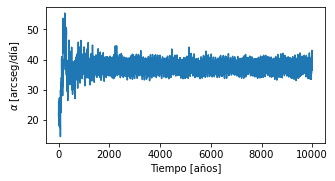

In [26]:
# Tamaño de la figura
fig = plt.figure(figsize=(5,2.5))
ax = plt.subplot(111)
# Gráfica
plt.plot(times,alpha_arcseg)
# Etiquetas de los ejes
ax.set_xlabel('Tiempo [años]')
ax.set_ylabel(r'$\alpha$ [arcseg/día]')
# Guardar la gráfica en un archivo
plt.savefig('3200Phaeton_alpha.pdf',bbox_inches='tight');

## Evolución del resto de elementos orbitales
Se grafica la evolución de la excentricidad, la inclinación, la longitud del nodo ascendente y el argumento del periastro.

In [28]:
# Se convierten los elementos orbitales de radianes a grados
inc_grados = np.degrees(inc[2])
Omega_grados = np.degrees(Omega[2])
omega_grados = np.degrees(omega[2])

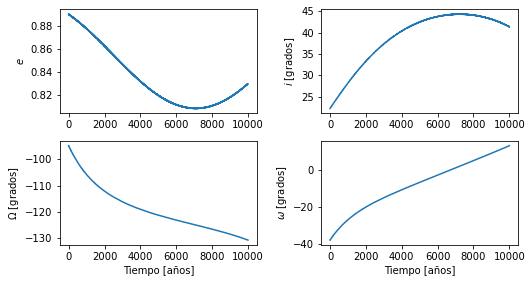

In [32]:
# Tamaño de la figura (4 subplots en un array 2x2)
fig,axs = plt.subplots(2,2,figsize=(7.5,4))
# Gràfica de la excentricidad
axs[0,0].plot(times,ecc[2])
axs[0,0].set_ylabel(r'$e$')
# Gráfica de la inclinación
axs[0,1].plot(times,inc_grados)
axs[0,1].set_ylabel(r'$i$ [grados]')
# Gráfica de la longitud del nodo ascendente
axs[1,0].plot(times,Omega_grados)
axs[1,0].set_ylabel(r'$\Omega$ [grados]')
axs[1,0].set_xlabel('Tiempo [años]')
# Gráfica del argumento del periastro
axs[1,1].plot(times,omega_grados)
axs[1,1].set_ylabel(r'$\omega$ [grados]')
axs[1,1].set_xlabel('Tiempo [años]')
# Evitar que se encimen los ejes
fig.tight_layout()
# Guardar la gráfica en un archivo
plt.savefig('3200Phaeton_elementosOrbitales.pdf',bbox_inches='tight');